In [1]:
import qmath
import torch
import mbqc

# Cluster state

## using graph for cluster state

In [2]:
verties = [0,1,2]
edge = [[0,1]]
graph = [verties, edge]
mbqc_q2 = mbqc.MBQC(nqubit=2)
mbqc_q2.set_graph(graph)

In [3]:
test = mbqc_q2()
test

tensor([ 0.3536,  0.3536,  0.3536,  0.3536,  0.3536,  0.3536, -0.3536, -0.3536])

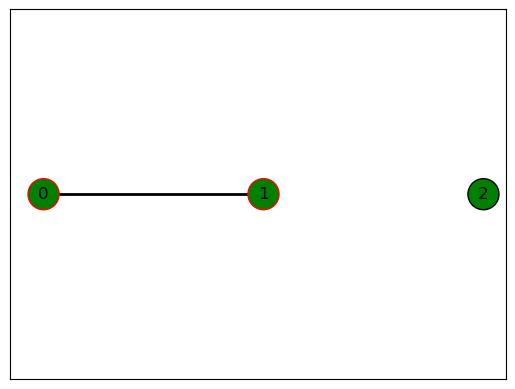

In [4]:
mbqc_q2.draw()

## Construct graph state step by step

In [5]:
mbqc_q2 = mbqc.MBQC(nqubit=2)
mbqc_q2.node(2)
mbqc_q2.node(3)
mbqc_q2.node(4)
mbqc_q2.node(5)
mbqc_q2.node(6)
mbqc_q2.node(7)
mbqc_q2.entanglement([0,2])
mbqc_q2.entanglement([1,2])
mbqc_q2.entanglement([0,3])
mbqc_q2.entanglement([1,6])

In [6]:
mbqc_q2

MBQC(
  (operators): Sequential(
    (0): Node(wires=[2])
    (1): Node(wires=[3])
    (2): Node(wires=[4])
    (3): Node(wires=[5])
    (4): Node(wires=[6])
    (5): Node(wires=[7])
    (6): Entanglement(wires=[0, 2])
    (7): Entanglement(wires=[1, 2])
    (8): Entanglement(wires=[0, 3])
    (9): Entanglement(wires=[1, 6])
  )
)

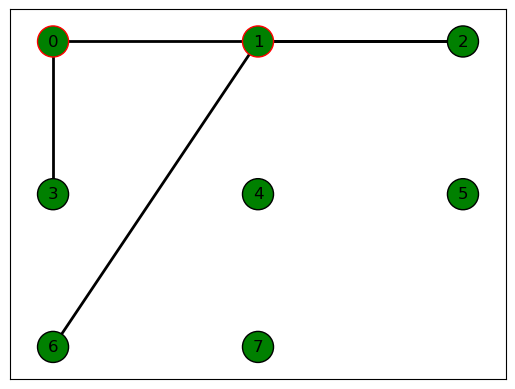

In [7]:
mbqc_q2.draw()

# Measurement

In [1]:
import qmath
import torch
import mbqc

In [5]:
verties = [0,1,2,3]
edge = [[0,2]]
graph = [verties, edge]
mbqc_q2 = mbqc.MBQC(nqubit=3)
mbqc_q2.set_graph(graph)
mbqc_q2.measurement(0)
mbqc_q2.measurement(2)

In [6]:
mbqc_q2.operators

Sequential(
  (0): Node(wires=[3])
  (1): Entanglement(wires=[0, 2])
  (2): Measurement(wires=[0], plane=XY, angle=0, t_domain=None, s_domain=None)
  (3): Measurement(wires=[2], plane=XY, angle=0, t_domain=None, s_domain=None)
)

In [7]:
mbqc_q2()

perm [0, 2, 1, 3]


tensor([0.5000+0.j, 0.5000+0.j, 0.5000+0.j, 0.5000+0.j])

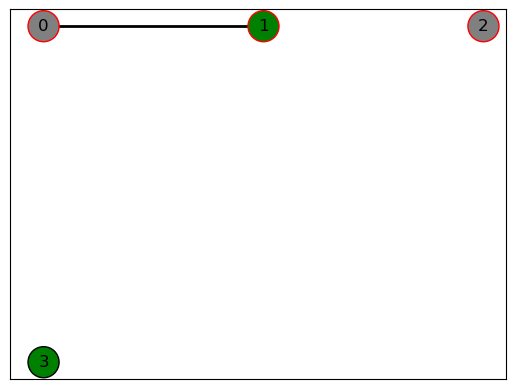

In [14]:
mbqc_q2.draw()

# NMEC_NEMC Pattern

In [1]:
import qmath
import torch
import mbqc

In [2]:
mbqc_q2 = mbqc.MBQC(nqubit=2)
mbqc_q2.node(2)
mbqc_q2.node(3)
mbqc_q2.entanglement([0,2])
mbqc_q2.entanglement([1,2])
mbqc_q2.measurement([0])
mbqc_q2.X(1, signal_domain=[0])

In [3]:
test = mbqc_q2()

In [4]:
test

tensor([ 5.0000e-01+0.j,  5.0000e-01+0.j,  8.7289e-09+0.j,  8.7289e-09+0.j,
         5.0000e-01+0.j,  5.0000e-01+0.j, -8.7289e-09+0.j, -8.7289e-09+0.j])

In [21]:
mbqc_q2 = mbqc.MBQC(nqubit=2)
mbqc_q2.node(2)
mbqc_q2.node(3)
mbqc_q2.entanglement([0,2])
mbqc_q2.entanglement([1,2])
mbqc_q2.measurement([0])
mbqc_q2.X(1)
mbqc_q2.node(4)
mbqc_q2.node(5)
# mbqc_q2.entanglement([0,4])
mbqc_q2.entanglement([4,5])
mbqc_q2.measurement([1])
mbqc_q2.X(3)
mbqc_q2.node(6)
mbqc_q2.entanglement([2,6])
mbqc_q2.measurement([2])
# mbqc_q2.X(4)

In [26]:
mbqc_q2.measured_dic

{0: 1, 1: 1, 2: 1}

In [23]:
mbqc_q2.unmeasured_dic

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}

In [24]:
test = mbqc_q2()
test.size(), mbqc_q2.unmeasured_dic

perm [0, 2, 1, 3]
perm [1, 2, 0, 3]
perm [3, 4, 0, 1, 2]
perm [0, 4, 1, 2, 3]


(torch.Size([16]), {3: 0, 4: 1, 5: 2, 6: 3})

In [14]:
mbqc_q2._node_list, mbqc_q2._edge_list

([0, 1, 2, 3, 4, 5], [[0, 2], [1, 2], [4, 5]])

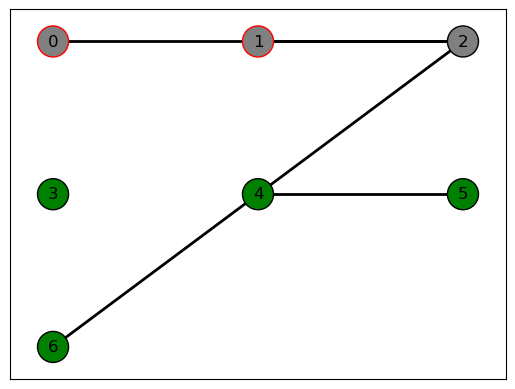

In [25]:
mbqc_q2.draw()